
##First Expirement



###Installing Software

In [1]:
pip install tqdm boto3 requests regex sentencepiece sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 63.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 102.1 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=7ee3dff2db2832e2e8e20eeaf1b47cb21435413e871906039216c78da5b43b43
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.4 MB/s eta 0:00:00


In [3]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


###Preprocessing Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import transformers
import re
import torch
import tensorflow

In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test_full.csv')


In [9]:
train_data

,Unnamed: 0,Sentences,Sentiment
0,0,Working with one of the best Shakespeare sourc...,0
1,1,"Well...tremors I, the original started off in ...",0
2,2,Ouch! This one was a bit painful to sit throug...,0
3,3,"I've seen some crappy movies in my life, but t...",0
4,4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...,...
1995,1995,"Without ""mental anachronism"", this film which ...",1
1996,1996,This movie is just great. It's entertaining fr...,1
1997,1997,I've seen the original English version on vide...,1
1998,1998,"Hello, I was alanrickmaniac. I'm a Still Crazy...",1


In [10]:
test_data

,Sentences,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


In [11]:
train_texts, train_labels = train_data["Sentences"], train_data["Sentiment"]
test_texts, test_labels = test_data["Sentences"], test_data["Sentiment"]
len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(2000, 2000, 25000, 25000)

In [12]:
# sentences = [len(sent) for sent in train_texts]

# plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# plt.bar(range(1,2001), sentences, color = ['red'])
# plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence');

###Start Tokenization

In [14]:
from transformers import BertTokenizer
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache


/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip


In [30]:
tokenizer.tokenize('Hi my name is Atul')

['hi', 'my', 'name', 'is', 'at', '##ul']

In [31]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], test_texts))

len(train_tokens), len(test_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (1013 > 512). Running this sequence through the model will result in indexing errors


(2000, 25000)

In [32]:
from keras_preprocessing.sequence import pad_sequences
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape


((2000, 512), (25000, 512))

In [33]:
print(train_tokens_ids)

[[  101  2551  2007 ...     0     0     0]
 [  101  2092  1012 ...     0     0     0]
 [  101 15068  2818 ...     0     0     0]
 ...
 [  101  1045  1005 ...     0     0     0]
 [  101  7592  1010 ...     0     0     0]
 [  101  1999  2070 ... 10021  2066   102]]


In [34]:
train_y = np.array(train_labels) == 1
test_y = np.array(test_labels) == 1
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((2000,), (25000,), 0.5, 0.5)

In [35]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

In [36]:
print(train_masks)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
from torch import nn
from transformers import BertModel

class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        outputs = self.bert(tokens, attention_mask=masks, return_dict=True)
        pooled_output = outputs.pooler_output
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [39]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'1784.868352M'

In [40]:
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()     # running BERT on CUDA_GPU

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'2224.203776M'

In [42]:
x = torch.tensor(train_tokens_ids[:3]).to(device)
y = bert_clf.bert(x)
pooled = y.pooler_output
x.shape, pooled.shape

(torch.Size([3, 512]), torch.Size([3, 768]))

In [43]:
y = bert_clf(x)
y.cpu().detach().numpy()        # kinda Garbage Collector to free up used and cache space

array([[0.5613445],
       [0.5346461],
       [0.5255655]], dtype=float32)

In [44]:
# Cross- checking CUDA GPU Memory to ensure GPU memory is not overflowing.
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'4962.553856M'

In [45]:
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'2224.195584M'

###Fine Tune Bert

In [46]:
# Setting hyper-parameters

BATCH_SIZE = 4
EPOCHS = 5

In [47]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'2224.195584M'

In [48]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [49]:
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

In [50]:
from torch.optim import Adam
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

In [51]:
torch.cuda.empty_cache()   # Clearing Cache space for a fresh Model run

In [52]:
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

Epoch:  5
499/500.0 loss: 0.12736685014166868 


In [53]:
bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])

In [54]:
from sklearn.metrics import classification_report
bert_predicted_y = bert_predicted
print(classification_report(test_y, bert_predicted_y))

              precision    recall  f1-score   support

       False       0.89      0.93      0.91     12500
        True       0.93      0.89      0.91     12500

    accuracy                           0.91     25000
   macro avg       0.91      0.91      0.91     25000
weighted avg       0.91      0.91      0.91     25000



###Confusion Matrix Test Data


In [55]:
wrong = {"z_o" : [], "o_z": []}
true = {"z": [], "o": []}
i = 0
for a,b in zip(bert_predicted_y,test_y):
  if a == 0 and b == 1: #false negative
    wrong["z_o"].append(i)
  elif a == 1 and b == 0: #false positive
    wrong["o_z"].append(i)
  elif a == 0 and b == 0:
    true["z"].append(i)
  elif a == 1 and b == 1:
    true["o"].append(i)
  i += 1
print(len(wrong["z_o"]), len(wrong["o_z"]))
print(len(true["z"]), len(true["o"]))

1396 845
11655 11104


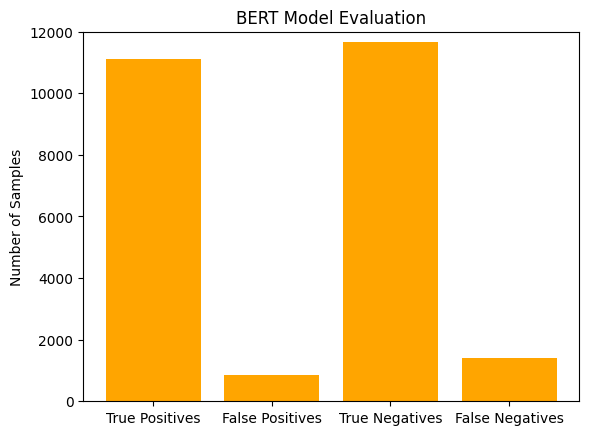

In [56]:
import matplotlib.pyplot as plt

# Data
false_positives = len(wrong["o_z"])
false_negatives = len(wrong["z_o"])
true_positives = len(true["o"])
true_negatives = len(true["z"])

# Plotting
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [true_positives, false_positives, true_negatives, false_negatives]
colors = ['orange', 'orange', 'orange', 'orange'] # Set the color of all bars to orange
plt.bar(labels, values, color=colors)

# Customization
plt.title('BERT Model Evaluation')
plt.ylabel('Number of Samples')
plt.ylim(top=12000) # Set the y-axis limit to avoid overlapping with title
plt.show()

In [57]:
wrong["z_o"].remove(17047)

In [58]:
import random as rand
false_positive_index = rand.choice(wrong["o_z"])
false_negative_index= rand.choice(wrong["z_o"])

min = 1000000
best_i = 0
for i in wrong["o_z"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_i = i

min = 1000000
best_j = 0
for i in wrong["z_o"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_j = i

print(best_i)
print(best_j)

10967
15459


###False positive

In [96]:
false_positive_sentence = test_data.iloc[10967]["Sentences"]
false_negative_sentence = test_data.iloc[23404]["Sentences"]
print(false_positive_sentence)
print(len(false_positive_sentence), len(false_negative_sentence))

More suspenseful, more subtle, much, much more disturbing....
61 156


In [97]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        false_positive_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])


[[101, 2062, 23873, 3993, 1010, 2062, 11259, 1010, 2172, 1010, 2172, 2062, 14888, 1012, 1012, 1012, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [98]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[  101,  2062, 23873,  3993,  1010,  2062, 11259,  1010,  2172,  1010,
          2172,  2062, 14888,  1012,  1012,  1012,  1012,   102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [99]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [100]:
print(temp[0])

tensor([  101,  2062, 23873,  3993,  1010,  2062, 11259,  1010,  2172,  1010,
         2172,  2062, 14888,  1012,  1012,  1012,  1012,   102])


In [101]:
output_attentions_all = pred[-1]
heads = output_attentions_all[3].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  # print(e[0])
  print(i)
  cls = e[0, :][0]
  cls_ls.append(cls)
  best_layer = e[0, :]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.10):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])


0
[CLS] 0.26237747
[SEP] 0.60025674
1
[CLS] 0.34566993
[SEP] 0.5231459
2
suspense 0.110108554
[SEP] 0.14704749
3
[CLS] 0.3644978
[SEP] 0.47574818
4
[CLS] 0.15269692
[SEP] 0.49148172
5
[CLS] 0.7493454
. 0.16886035
6
[CLS] 0.108637676
disturbing 0.112549484
[SEP] 0.30386195
7
[CLS] 0.60160947
[SEP] 0.19525519
8
[CLS] 0.5046888
[SEP] 0.4172749
9
[CLS] 0.6099938
[SEP] 0.1633496
10
[CLS] 0.25564837
[SEP] 0.6969757
11
[CLS] 0.6830945
[SEP] 0.19037062
0.39363095


<Axes: >

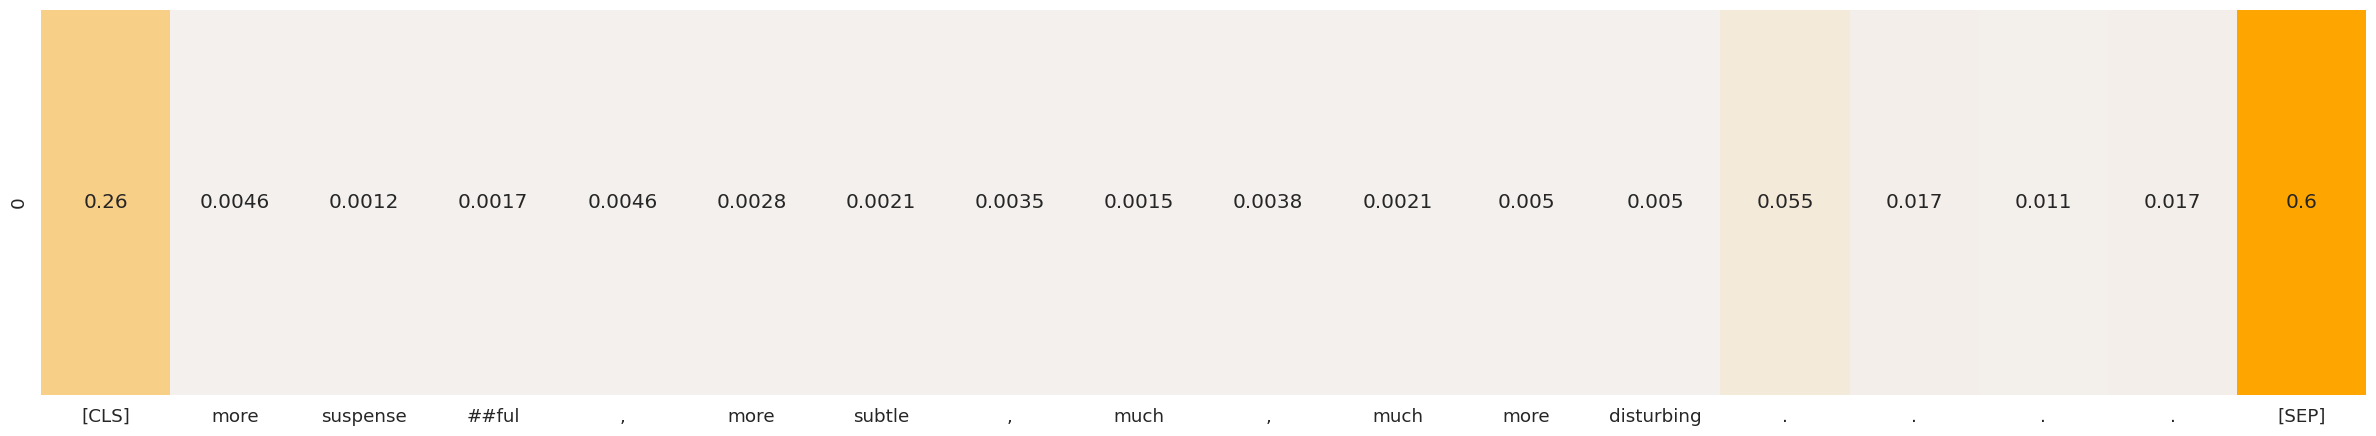

In [106]:
import seaborn as sns
import numpy as np

# Define the list of words for the x-axis
words = tokenizer.convert_ids_to_tokens(temp[0])
# Define the input vector
vector = np.array(heads[0][0])

# Convert the input vector to a matrix with one row and the same number of columns as the words list
matrix = np.reshape(vector, (1, len(words)))

sns.set(rc={'figure.figsize':(30,5)})
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)

# Create the heatmap using Seaborn
sns.heatmap(matrix, annot=True, xticklabels=words, cmap=sns.light_palette('orange', as_cmap=True), cbar=False)


In [66]:
output_attentions_all = pred[-1]
heads = output_attentions_all[3].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  print(i)
  best_layer = e[:, 0]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.10):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])

0
[CLS] 0.26237747
suspense 0.28445858
##ful 0.259944
, 0.15256551
subtle 0.40501657
, 0.21922806
much 0.17591563
, 0.2430324
much 0.18083276
disturbing 0.39220974
. 0.16655914
. 0.17879494
. 0.12205629
[SEP] 0.2562435
1
[CLS] 0.34566993
, 0.12986389
subtle 0.19307266
much 0.116307914
much 0.15805207
. 0.17567444
. 0.18605042
. 0.16209947
[SEP] 0.46510965
2
more 0.11835049
suspense 0.2738188
##ful 0.31622395
more 0.15769342
subtle 0.30671245
much 0.1661646
much 0.13446204
more 0.20155181
disturbing 0.33171412
. 0.2218286
. 0.28852665
. 0.28533664
. 0.17841493
[SEP] 0.12832241
3
[CLS] 0.3644978
suspense 0.3962484
##ful 0.10533629
subtle 0.2465292
much 0.20010546
much 0.2167035
more 0.15333223
disturbing 0.42666805
. 0.214544
. 0.22439569
. 0.27564695
. 0.34123302
[SEP] 0.32470024
4
[CLS] 0.15269692
more 0.12825224
##ful 0.15792093
more 0.11856281
subtle 0.119582236
much 0.19585657
much 0.18277924
more 0.22066852
disturbing 0.18616065
[SEP] 0.6849217
5
[CLS] 0.7493454
more 0.8076594
susp

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [67]:
pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.1 MB/s eta 0:00:00


In [68]:
def visualize_token2token_scores(scores_mat, x_label_name='Head', all_tokens = encoded_false_pos_sentence['input_ids'] ):
    fig = plt.figure(figsize=(20, 20))

    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(all_tokens)))
        ax.set_yticks(range(len(all_tokens)))

        ax.set_xticklabels(range(len(all_tokens)), fontdict=fontdict, rotation=90)
        ax.set_yticklabels(range(len(all_tokens)), fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(x_label_name, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

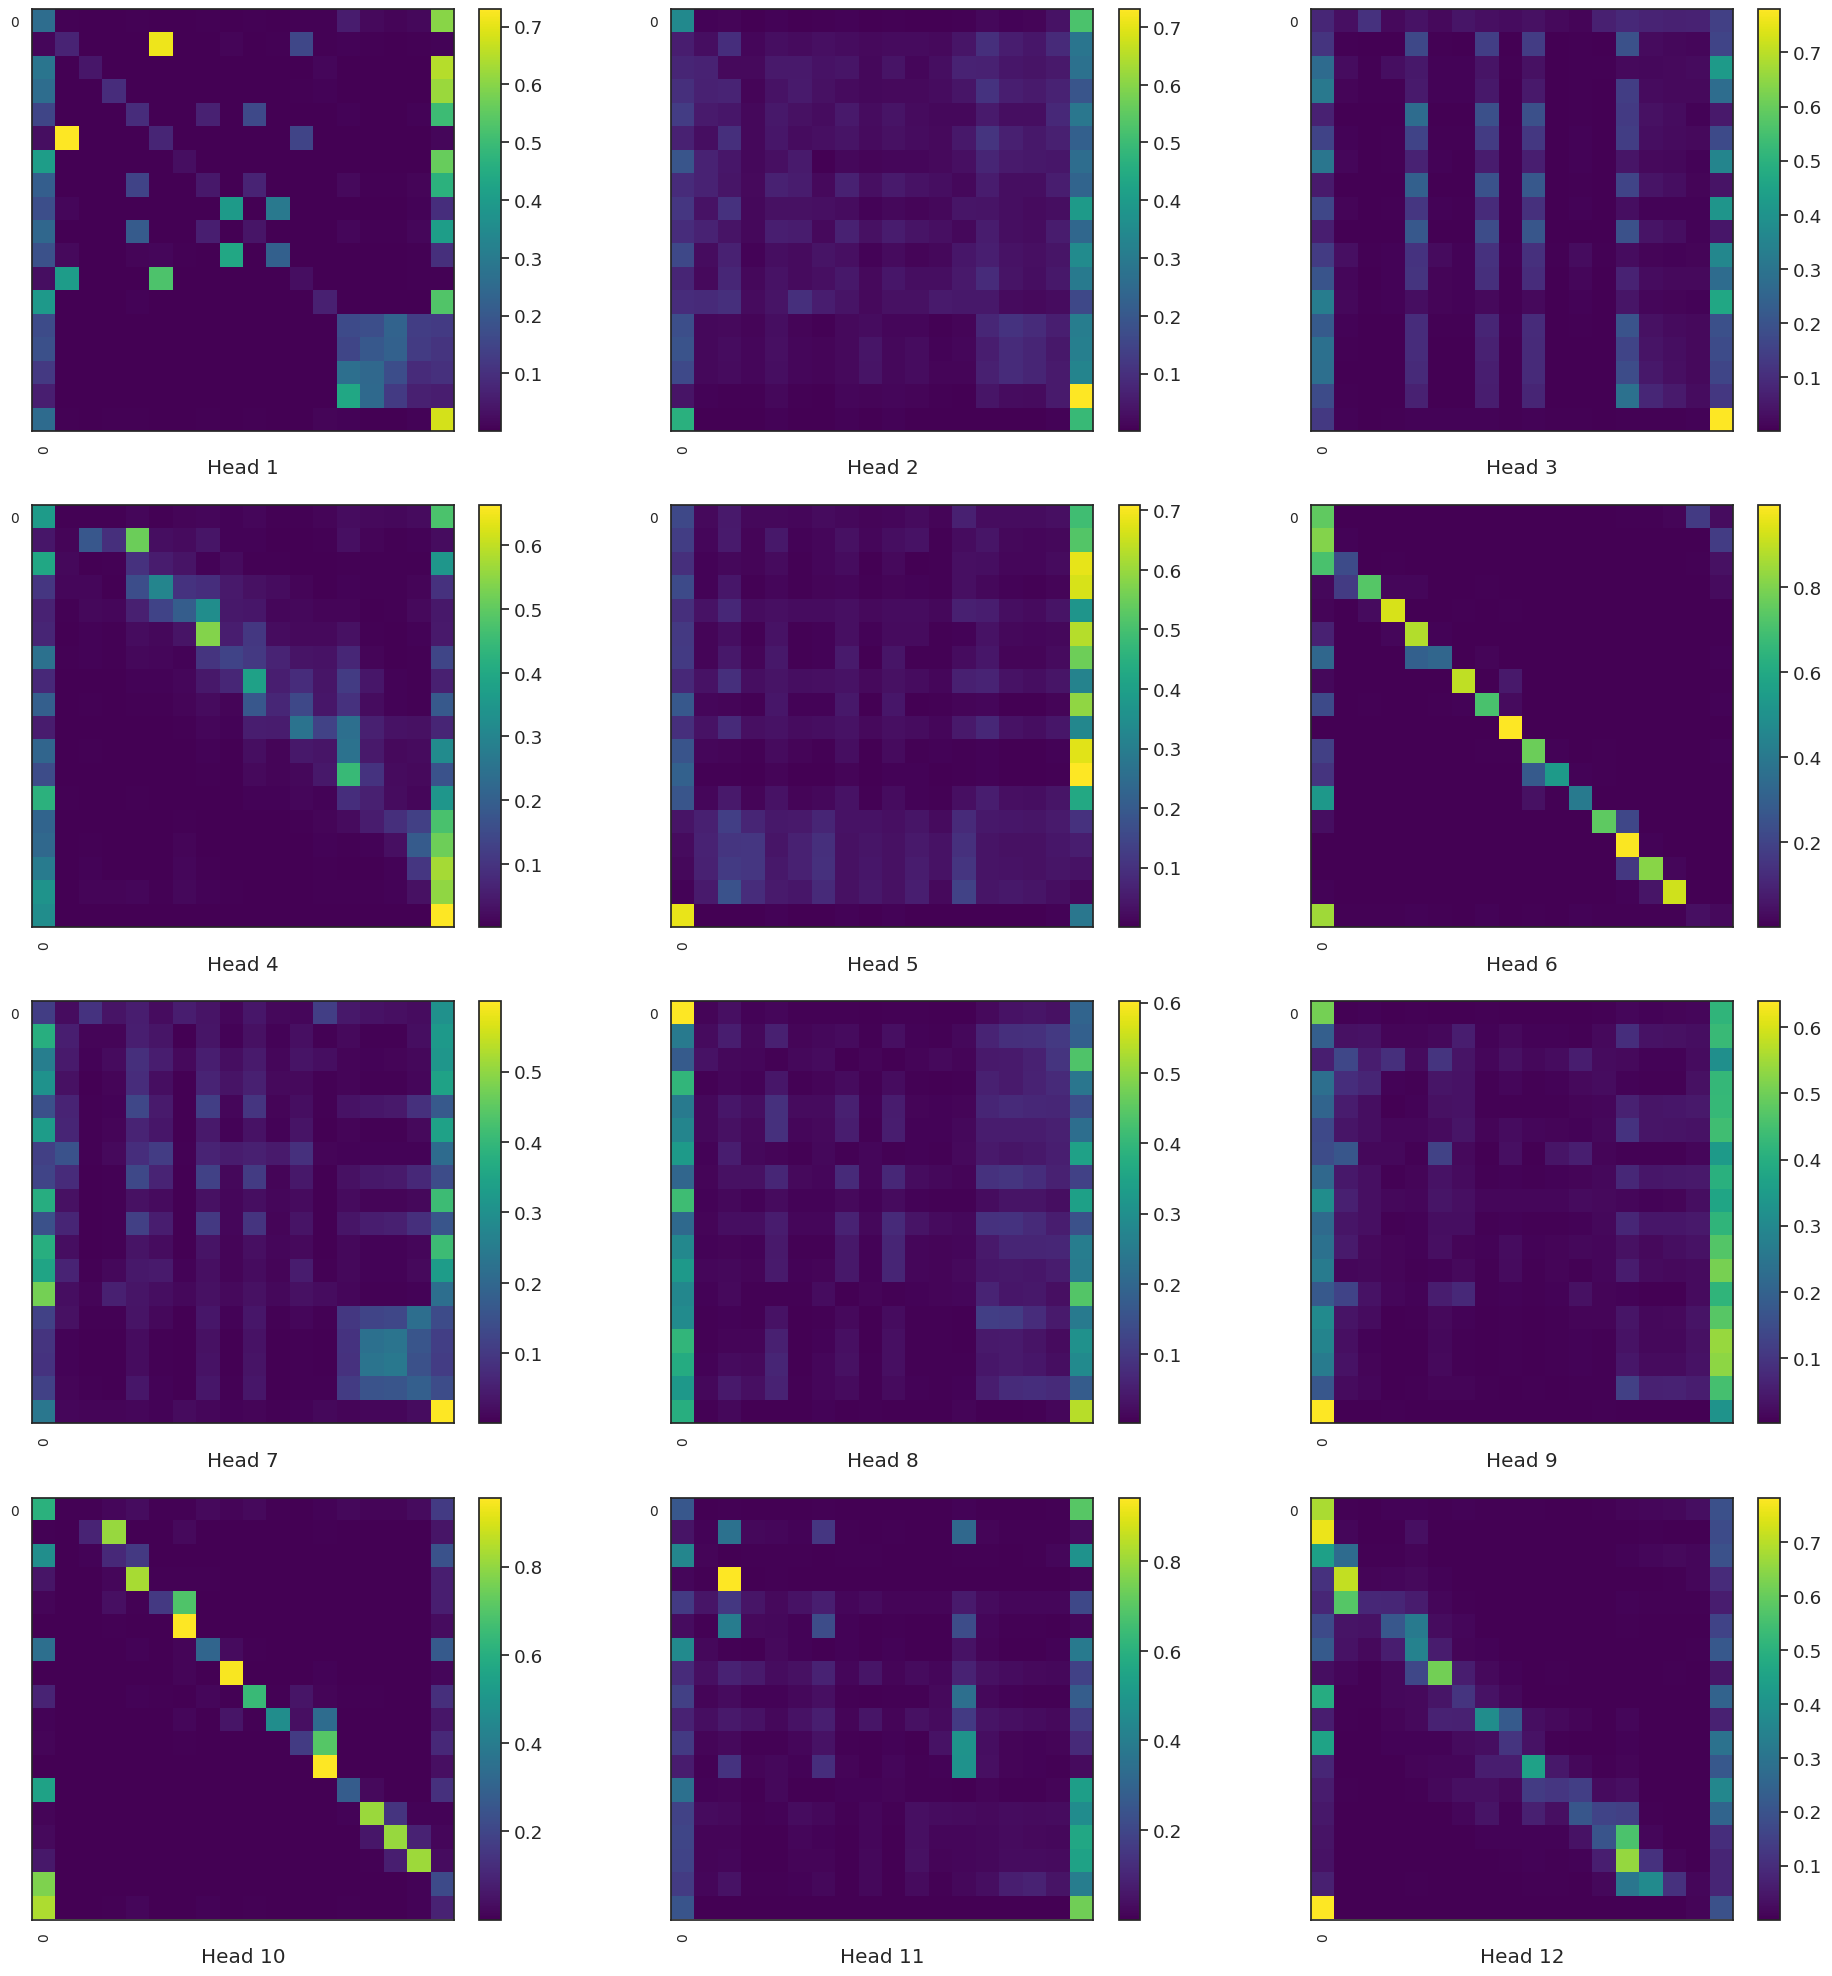

In [69]:
visualize_token2token_scores(output_attentions_all[3].squeeze().detach().cpu().numpy())

###False Negative

In [107]:
false_negative_sentence = test_data.iloc[15149]["Sentences"]
print(false_negative_sentence)
print(len(false_negative_sentence))

Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
178


In [108]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_neg_sentence = tokenizer.encode_plus(
                        false_negative_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_neg_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_neg_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_neg_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 5409, 5469, 2143, 2412, 2021, 4569, 15580, 2102, 2143, 2412, 4565, 1999, 2028, 2017, 2031, 2288, 2000, 2156, 2023, 2143, 2009, 2003, 2061, 10036, 2009, 2003, 4895, 8671, 2401, 3726, 3468, 2021, 2017, 2031, 2000, 2156, 2009, 2428, 999, 999, 999, 999, 1052, 1012, 1055, 3422, 1996, 25659, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [109]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[  101,  5409,  5469,  2143,  2412,  2021,  4569, 15580,  2102,  2143,
          2412,  4565,  1999,  2028,  2017,  2031,  2288,  2000,  2156,  2023,
          2143,  2009,  2003,  2061, 10036,  2009,  2003,  4895,  8671,  2401,
          3726,  3468,  2021,  2017,  2031,  2000,  2156,  2009,  2428,   999,
           999,   999,   999,  1052,  1012,  1055,  3422,  1996, 25659,   102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]])


In [110]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [111]:
output_attentions_all = pred[-1]
heads = output_attentions_all[3].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  # print(e[0])
  print(i)
  cls = e[0, :][0]
  cls_ls.append(cls)
  best_layer = e[0, :]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.10):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])


0
[CLS] 0.39026573
[SEP] 0.42489627
1
[CLS] 0.37562203
[SEP] 0.4743001
2
3
[CLS] 0.40497273
[SEP] 0.4600868
4
[SEP] 0.28339022
5
[CLS] 0.8362011
6
horror 0.10451785
[SEP] 0.11900311
7
[CLS] 0.5881522
[SEP] 0.1521834
8
[CLS] 0.58530897
[SEP] 0.29744816
9
[CLS] 0.7355589
[SEP] 0.106209874
10
[CLS] 0.32057008
[SEP] 0.58967316
11
[CLS] 0.68940234
[SEP] 0.18354079
0.42460975


In [75]:
output_attentions_all = pred[-1]
heads = output_attentions_all[3].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  print(i)
  best_layer = e[:, 0]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.40):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])

0
worst 0.476629
fun 0.6215664
##nies 0.5351597
##t 0.49201807
rolled 0.5279204
in 0.4217605
one 0.43072513
got 0.6243115
so 0.54608715
cheap 0.43475327
un 0.42992803
##bel 0.54334545
##ia 0.60707766
##ve 0.5706412
p 0.6114624
. 0.4538456
s 0.47679982
watch 0.46175984
carrot 0.5777674
1
[SEP] 0.4770445
2
have 0.4024948
is 0.4049925
so 0.4360714
cheap 0.56826735
un 0.4450018
##ble 0.5590789
but 0.5175001
have 0.47131953
see 0.49306422
really 0.42006975
! 0.4133629
! 0.45492244
! 0.45836192
p 0.5921387
s 0.56371623
carrot 0.443117
3
[CLS] 0.40497273
cheap 0.45003662
really 0.50115746
4
[SEP] 0.7390579
5
[CLS] 0.8362011
worst 0.9343357
horror 0.56400645
##bel 0.46384367
but 0.41979143
[SEP] 0.7294555
6
rolled 0.43638846
one 0.41120306
p 0.40488404
carrot 0.4398476
7
[CLS] 0.5881522
worst 0.40799165
horror 0.46385145
fun 0.41049418
un 0.4238591
##ia 0.45300093
##ve 0.45992687
[SEP] 0.41250056
8
[CLS] 0.58530897
to 0.40226513
##ia 0.63588464
##ve 0.60380816
[SEP] 0.69260037
9
[CLS] 0.735558

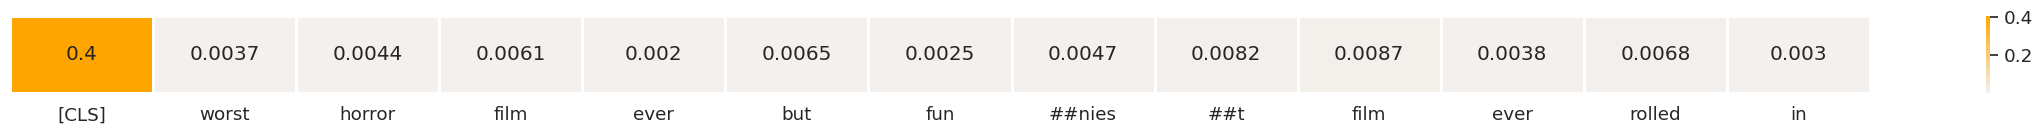

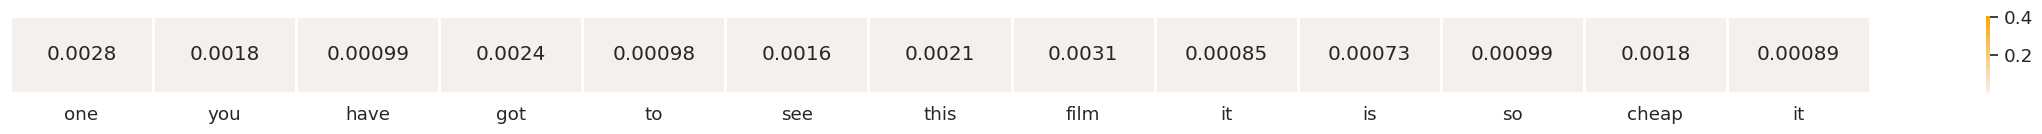

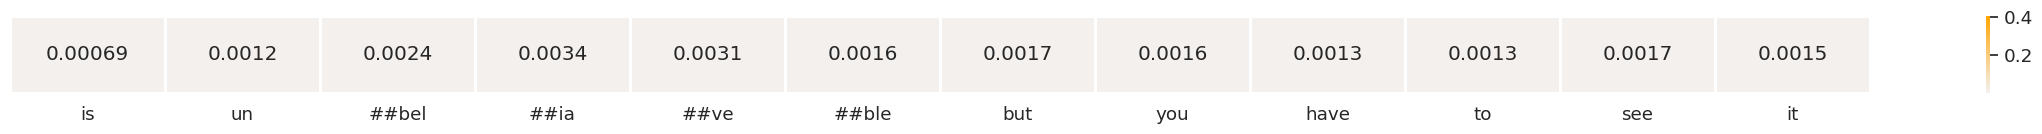

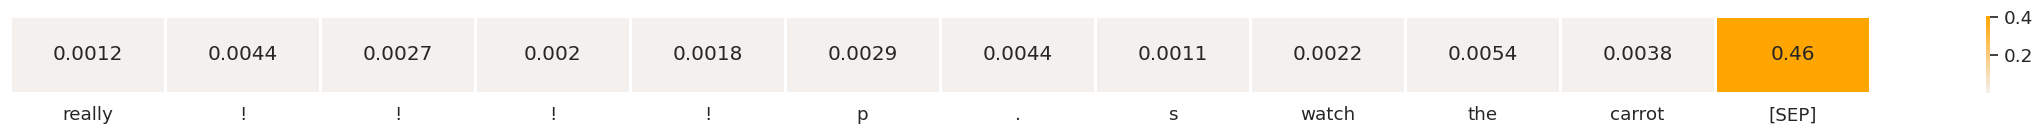

In [112]:
import seaborn as sns
import numpy as np

# Define the list of words for the x-axis
words = tokenizer.convert_ids_to_tokens(temp[0])
word_lists = np.array_split(words, 4)

# Define the input vector
vector = np.array(heads[3][0])
vector_lists  = np.array_split(vector, 4)


# Convert the input vector to a matrix with one row and the same number of columns as the words list
matrix = np.reshape(vector, (1, len(words)))
rounded_matrix = np.around(matrix, 2)

sns.set(rc={'figure.figsize':(30,1)})
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)

vmin = np.min(vector_lists[0])
vmax = np.max(vector_lists[0])

# Create the heatmap using Seaborn
for i in range(4):
    # Create a 1 x N matrix from the current vector list
    matrix = np.reshape(vector_lists[i], (1, -1))

    # Create a heatmap with the words on the x-axis and the vector values on the y-axis
    sns.heatmap(matrix, cmap=sns.light_palette('orange', as_cmap=True), linewidths=1,
                xticklabels=word_lists[i], yticklabels=False, annot=True, fmt='.2g',
                vmin=vmin, vmax=vmax)

    # Show the current heatmap
    plt.show()


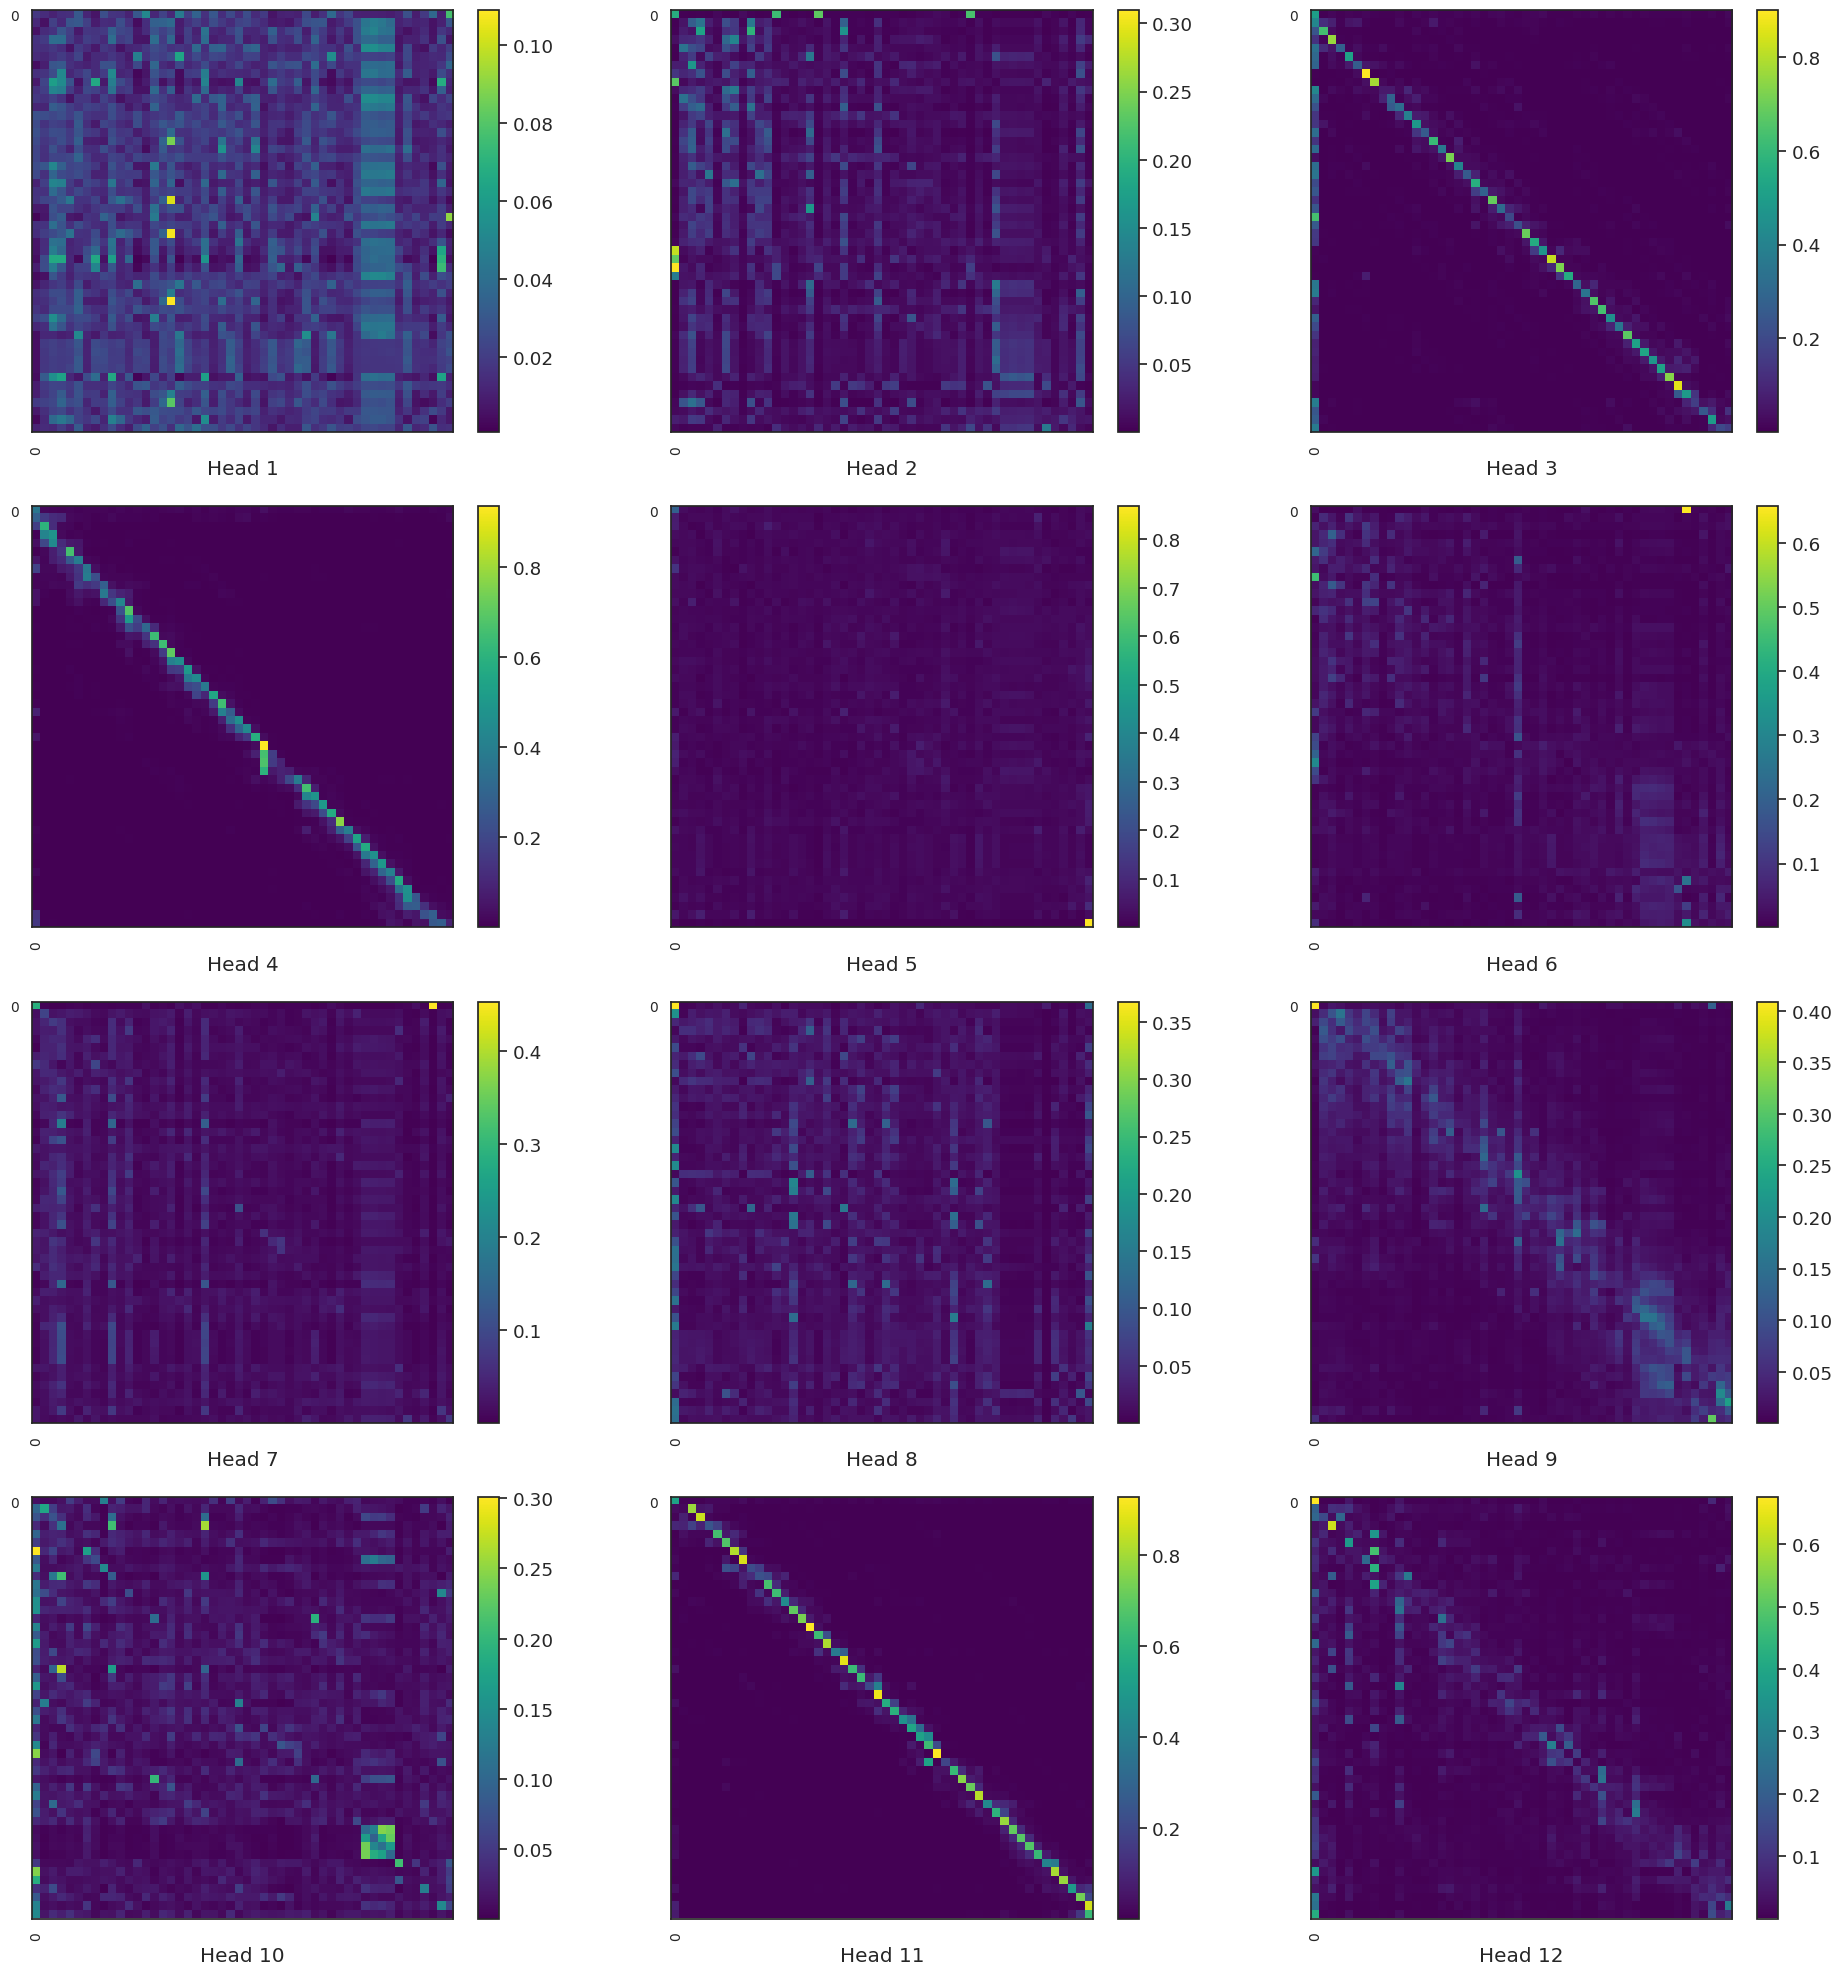

In [77]:
visualize_token2token_scores(output_attentions_all[0].squeeze().detach().cpu().numpy())

###True Positive

In [128]:
min = 1000000
best_i = 0
for i in true["o"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_i = i

print(best_i)


16357


In [129]:
import random as rand
true_positive_index = best_i
true_positive_sentence = test_data.iloc[true_positive_index]["Sentences"]
print(true_positive_sentence)

This is a great movie. Too bad it is not available on home video.


In [130]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        true_positive_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 2023, 2003, 1037, 2307, 3185, 1012, 2205, 2919, 2009, 2003, 2025, 2800, 2006, 2188, 2678, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [131]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[ 101, 2023, 2003, 1037, 2307, 3185, 1012, 2205, 2919, 2009, 2003, 2025,
         2800, 2006, 2188, 2678, 1012,  102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [132]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [133]:
output_attentions_all = pred[-1]
heads = output_attentions_all[2].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  # print(e[0])
  print(i)
  cls = e[0, :][0]
  cls_ls.append(cls)
  best_layer = e[0, :]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.10):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])


0
[CLS] 0.98320264
1
[CLS] 0.6894481
[SEP] 0.15962458
2
[CLS] 0.74354684
3
[CLS] 0.7001486
4
[CLS] 0.71538377
[SEP] 0.12609512
5
[CLS] 0.7395348
6
[CLS] 0.14528054
. 0.101843886
. 0.10230079
[SEP] 0.14258564
7
[CLS] 0.80743456
8
[CLS] 0.8029652
9
[CLS] 0.8222468
[SEP] 0.10183838
10
[CLS] 0.5498986
[SEP] 0.16017711
11
[CLS] 0.94499
0.72034


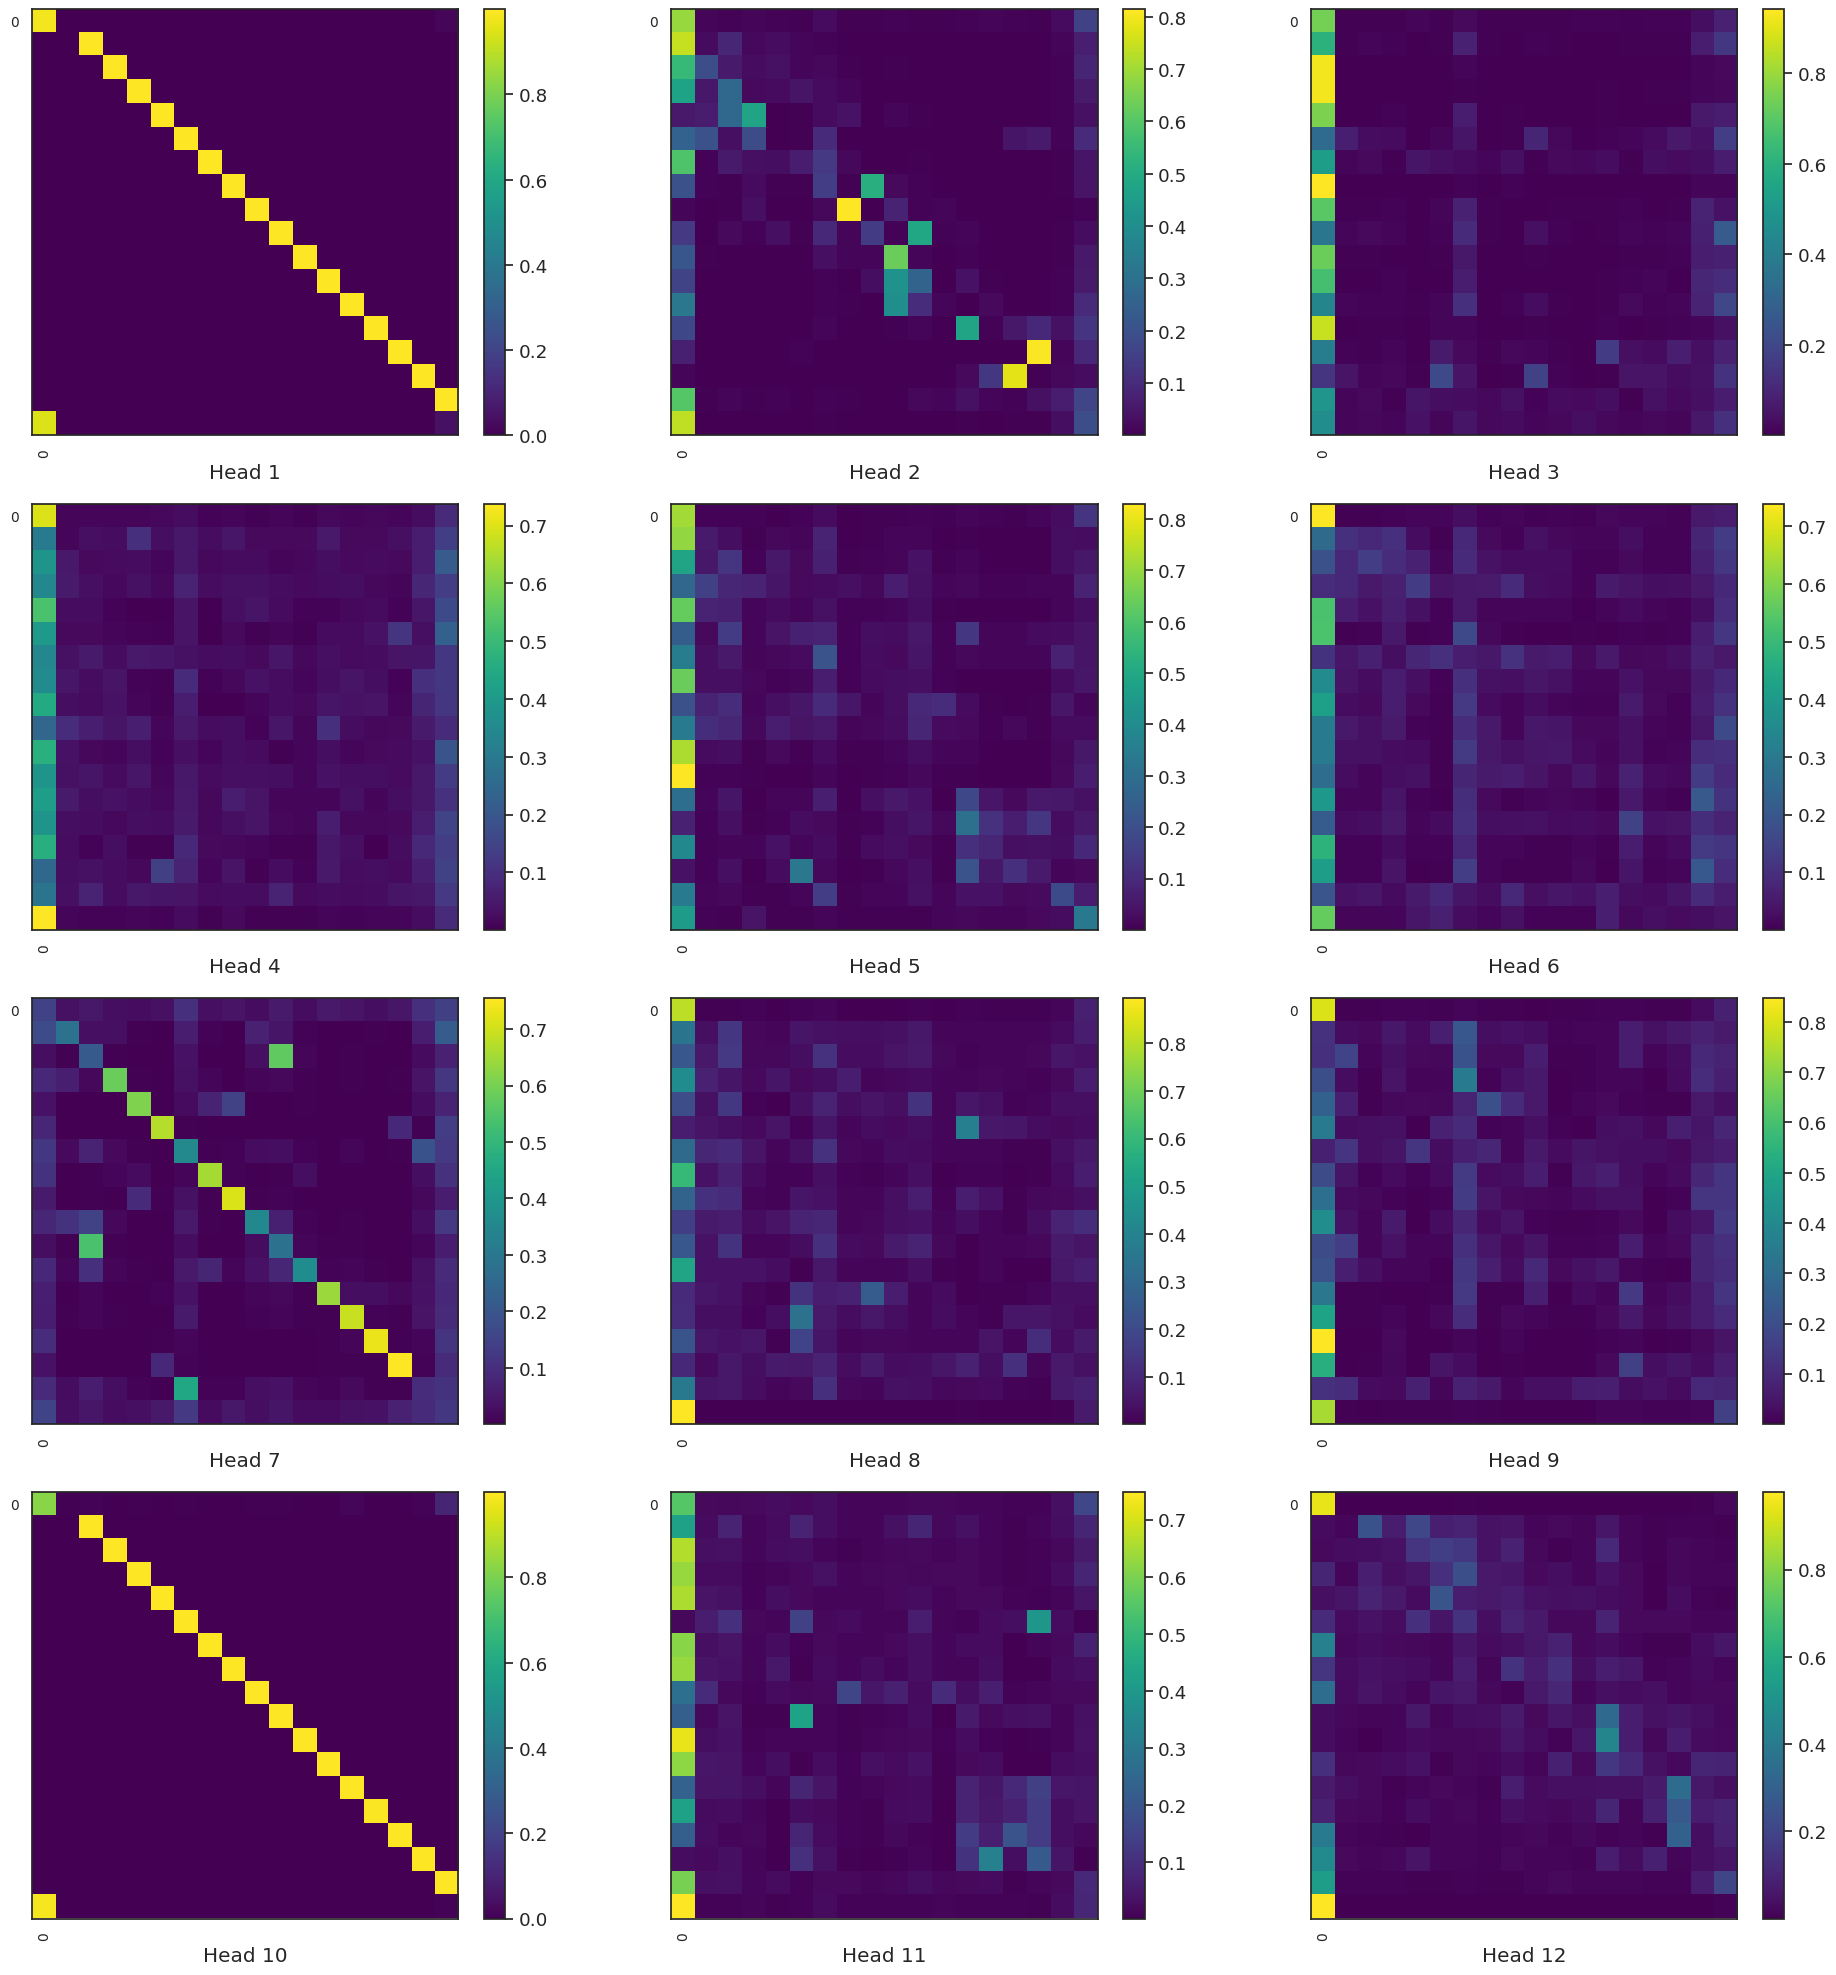

In [84]:
visualize_token2token_scores(output_attentions_all[2].squeeze().detach().cpu().numpy())

<Axes: >

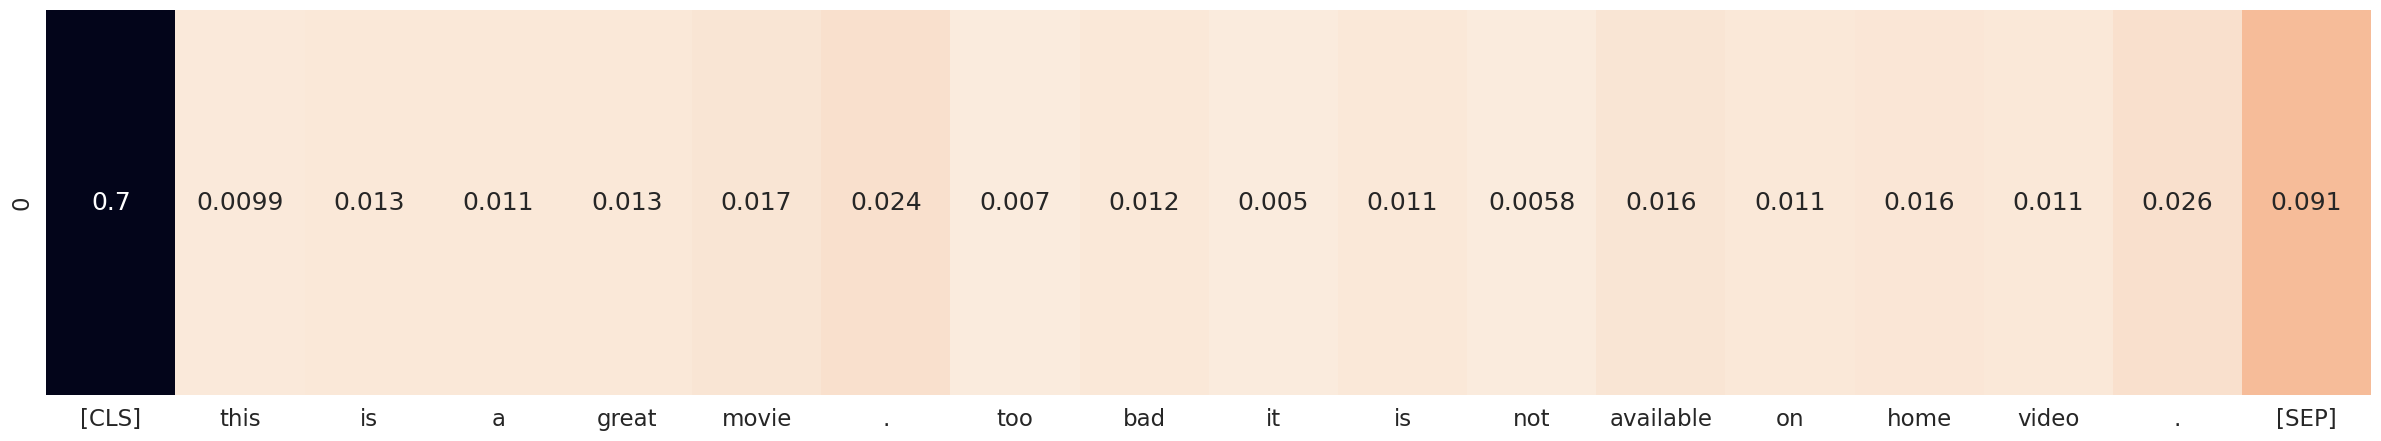

In [143]:
import seaborn as sns
import numpy as np

# Define the list of words for the x-axis
words = tokenizer.convert_ids_to_tokens(temp[0])
# Define the input vector
vector = np.array(heads[3][0])

# Convert the input vector to a matrix with one row and the same number of columns as the words list
matrix = np.reshape(vector, (1, len(words)))

sns.set(rc={'figure.figsize':(30,5)})
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)

# Create the heatmap using Seaborn
sns.heatmap(matrix, annot=True, xticklabels=words, cmap=sns.color_palette('rocket_r', as_cmap=True), cbar=False)


###True Negative

In [144]:
min = 1000000
best_i = 0
for i in true["z"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_i = i

print(best_i)


8999


In [145]:
import random as rand
# true_negative_index = best_i
true_negative_index = rand.choice(true["z"])
true_negative_sentence = test_data.iloc[8999]["Sentences"]
print(true_negative_sentence)

Read the book, forget the movie!


In [146]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        true_negative_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 3191, 1996, 2338, 1010, 5293, 1996, 3185, 999, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [147]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[ 101, 3191, 1996, 2338, 1010, 5293, 1996, 3185,  999,  102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [148]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [151]:
output_attentions_all = pred[-1]
heads = output_attentions_all[2].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
cls_ls = []
for e in heads:
  # print(e[0])
  print(i)
  cls = e[0, :][0]
  cls_ls.append(cls)
  best_layer = e[0, :]
  for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
    if(b > 0.10):
      print(a,b)
    # print(a,b)
  i += 1

print(np.mean(cls_ls))
# tokenizer.convert_ids_to_tokens(temp[0])


0
[CLS] 0.9815155
1
[CLS] 0.6885956
[SEP] 0.14907789
2
[CLS] 0.76948404
3
[CLS] 0.6938022
[SEP] 0.1354246
4
[CLS] 0.72113454
[SEP] 0.14228204
5
[CLS] 0.74776256
6
[CLS] 0.23124418
[SEP] 0.30587757
7
[CLS] 0.8241647
8
[CLS] 0.7968108
9
[CLS] 0.7548195
[SEP] 0.19842401
10
[CLS] 0.65426654
[SEP] 0.19039947
11
[CLS] 0.9484553
0.73433787


<Axes: >

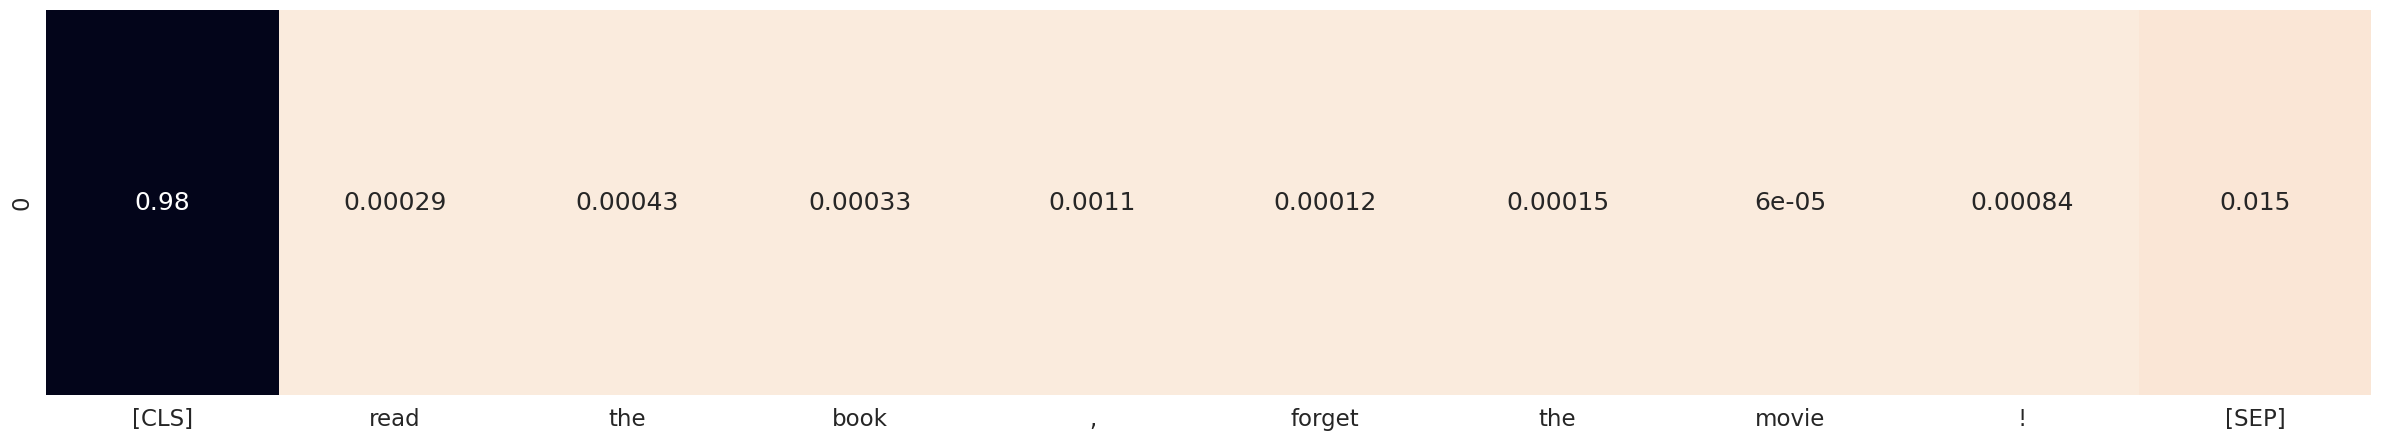

In [152]:
import seaborn as sns
import numpy as np

# Define the list of words for the x-axis
words = tokenizer.convert_ids_to_tokens(temp[0])
# Define the input vector
vector = np.array(heads[0][0])

# Convert the input vector to a matrix with one row and the same number of columns as the words list
matrix = np.reshape(vector, (1, len(words)))

sns.set(rc={'figure.figsize':(30,5)})
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)

# Create the heatmap using Seaborn
sns.heatmap(matrix, annot=True, xticklabels=words, cmap=sns.color_palette('rocket_r', as_cmap=True), cbar=False)


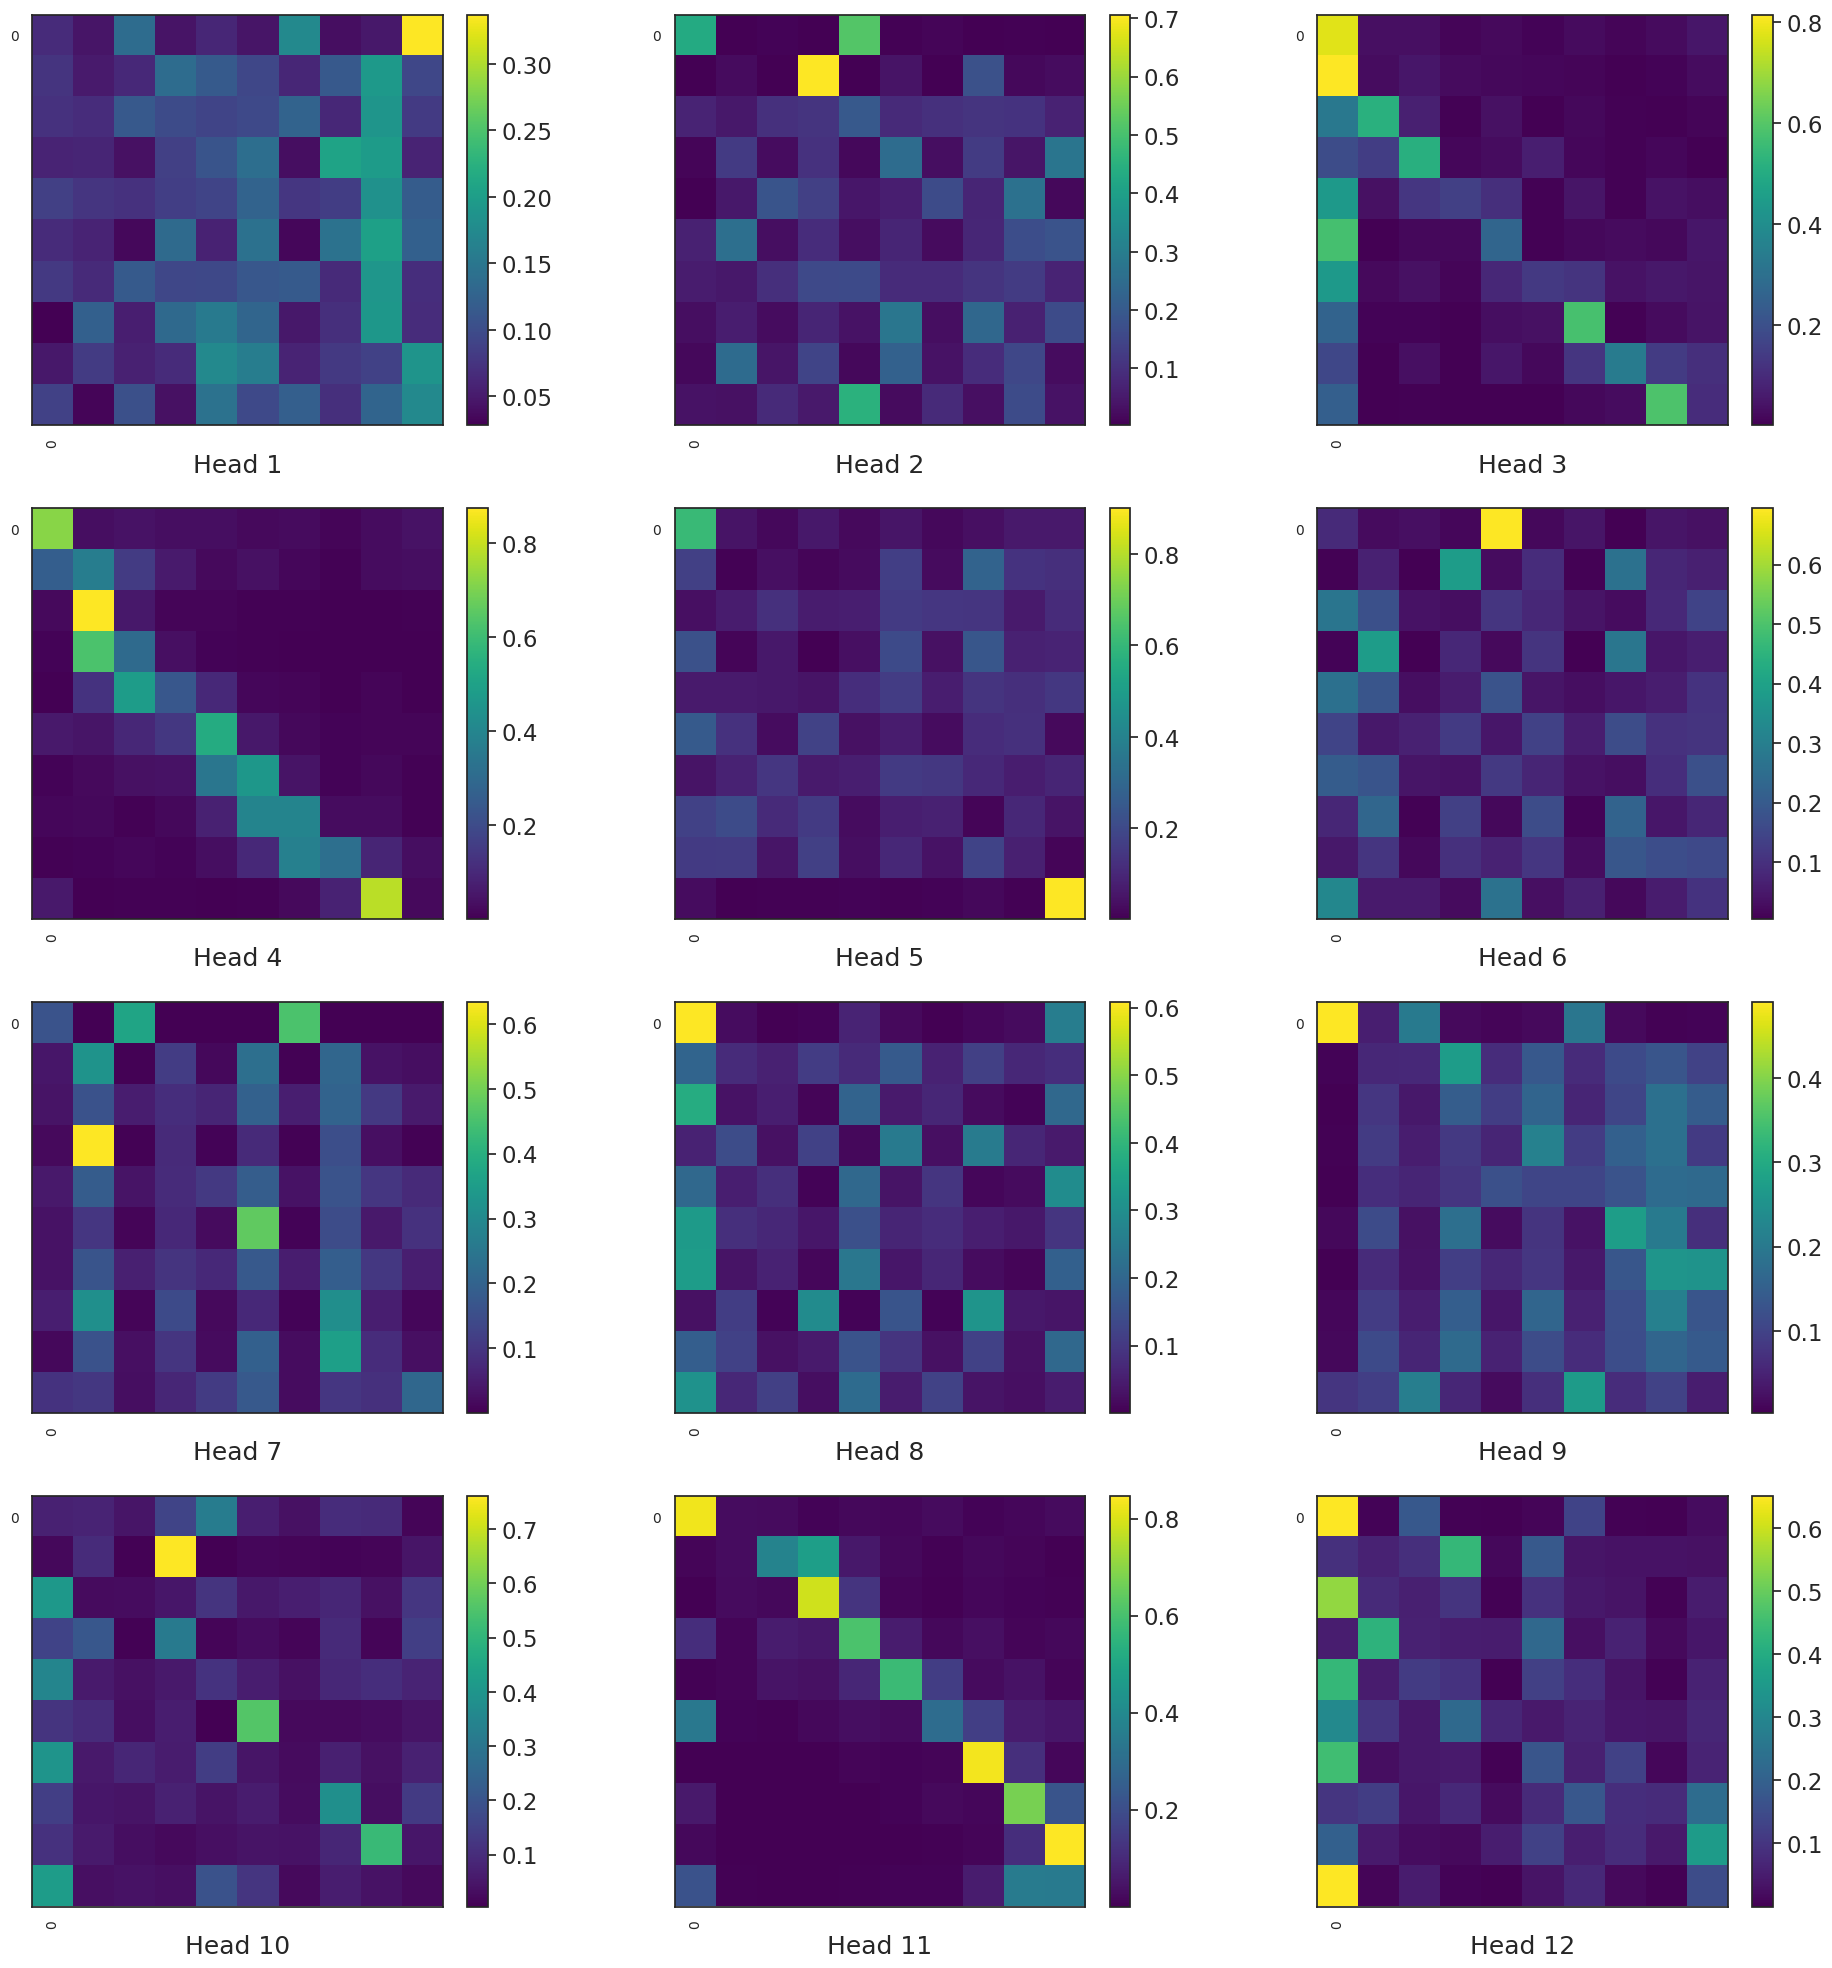

In [93]:
visualize_token2token_scores(output_attentions_all[0].squeeze().detach().cpu().numpy())

##Second Expirement: implemeting head-tail

In [94]:
# head+tail: empirically select the first 128 and the last 382 tokens.

In [16]:
train_tokens = []
for t in train_texts:
    tokens = tokenizer.tokenize(t)
    if len(tokens) > 510:
        tokens = tokens[:128] + tokens[-382:]
    else:
        tokens = tokens[:128]
    train_tokens.append(['[CLS]'] + tokens + ['[SEP]'])

test_tokens = []
for t in test_texts:
    tokens = tokenizer.tokenize(t)
    if len(tokens) > 510:
        tokens = tokens[:128] + tokens[-382:]
    else:
        tokens = tokens[:128]
    test_tokens.append(['[CLS]'] + tokens + ['[SEP]'])

from torch import nn
from transformers import BertModel

class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        outputs = self.bert(tokens, attention_mask=masks, return_dict=True)
        pooled_output = outputs.pooler_output
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

from keras_preprocessing.sequence import pad_sequences
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape
train_y = np.array(train_labels) == 1
test_y = np.array(test_labels) == 1
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()     # running BERT on CUDA_GPU
x = torch.tensor(train_tokens_ids[:3]).to(device)
y = bert_clf.bert(x)
pooled = y.pooler_output
x.shape, pooled.shape
y = bert_clf(x)
y.cpu().detach().numpy()        # kinda Garbage Collector to free up used and cache space
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run

# Setting hyper-parameters

BATCH_SIZE = 4
EPOCHS = 10


train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

from torch.optim import Adam
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])
from sklearn.metrics import classification_report
print(classification_report(test_y, bert_predicted))	








Epoch:  10
499/500.0 loss: 0.03193887354573235 
              precision    recall  f1-score   support

       False       0.88      0.86      0.87     12500
        True       0.86      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



1441 1786
10714 11059


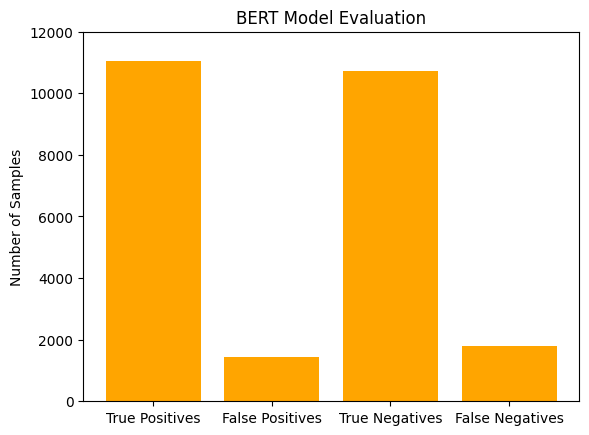

In [18]:


wrong = {"z_o" : [], "o_z": []}
true = {"z": [], "o": []}
i = 0
for a,b in zip(bert_predicted,test_y):
  if a == 0 and b == 1: #false negative
    wrong["z_o"].append(i)
  elif a == 1 and b == 0: #false positive
    wrong["o_z"].append(i)
  elif a == 0 and b == 0:
    true["z"].append(i)
  elif a == 1 and b == 1:
    true["o"].append(i)
  i += 1
print(len(wrong["z_o"]), len(wrong["o_z"]))
print(len(true["z"]), len(true["o"]))

# Data
false_positives = len(wrong["z_o"])
false_negatives = len(wrong["o_z"])
true_positives = len(true["o"])
true_negatives = len(true["z"])

# Plotting
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [true_positives, false_positives, true_negatives, false_negatives]
colors = ['orange', 'orange', 'orange', 'orange'] # Set the color of all bars to orange
plt.bar(labels, values, color=colors)

# Customization
plt.title('BERT Model Evaluation')
plt.ylabel('Number of Samples')
plt.ylim(top=12000) # Set the y-axis limit to avoid overlapping with title
plt.show()
